In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error as MAE
#min MAE_test : 0.9166086915416874 ,p value : 91
df_data = pd.read_csv("RyoriCO2.csv")
p=91

In [2]:
col2=df_data[df_data.columns[2]]
raw_co2=pd.to_numeric(col2, errors='coerce')
pp_co2=raw_co2.interpolate()
df_data[pp_co2.isna()]

,年,月,二酸化炭素濃度の月平均値(綾里)[ppm]


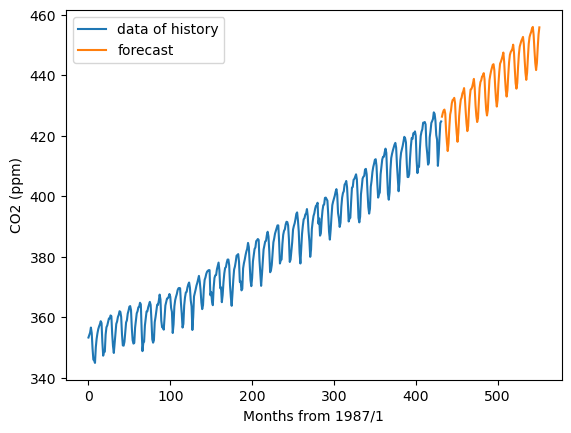

In [8]:
AR_model = AutoReg(pp_co2, lags=p).fit()
#次の10年間(120ヶ月)を予測
pred=AR_model.forecast(120)
index=range(len(pp_co2),len(pp_co2)+120)

plt.plot(pp_co2, label='data of history') #ryoriデータをプロット
plt.plot(index, pred, label='forecast')
plt.xlabel('Months from 1987/1')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.savefig("PDA_230868_12_2.png")
plt.show()